In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [71]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams['axes.linewidth'] = 1.0


font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

In [4]:
parametros = pd.read_csv('parametros_finais.csv', comment = '#')
aglomerado = pd.read_csv('final_5d.csv')

In [5]:
chi = parametros[parametros.Metodo == 'Chi']
beau = parametros[parametros.Metodo == 'Beauchamp']
dias = parametros[parametros.Metodo == 'DIAS2022']

In [6]:
dias

,Metodo,Age,ModDist
0,DIAS2022,9.3,13.01


In [7]:
dias.ModDist.item() - beau.ModDist.item()

0.013434282190655011

In [8]:
dias.ModDist.item() - chi.ModDist.item()

0.013434282190655011

In [21]:
cor, mag = aglomerado.bp_rp, aglomerado.phot_g_mean_mag

In [10]:
Av = 0.01 ##cantat
Av = 0.193/2
#Av = 0.183 ##dias
Ag = 0.83627*Av
E = (1.08337 - 0.63439)*Av

In [11]:
isocronas = pd.read_csv('../iso_gaia_clipped.csv')
isocrona_chi = isocronas[isocronas['logAge']==chi.Age.item()]
isocrona_beau = isocronas[isocronas['logAge']==beau.Age.item()]
isocrona_dias = isocronas[isocronas['logAge']==dias.Age.item()]

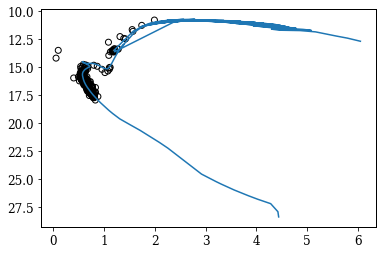

In [12]:
fig, ax = plt.subplots()
ax.scatter(cor,mag, color = 'None', edgecolor = 'black')
ax.plot(isocrona_chi['BP-RP'] + E, isocrona_chi['Gmag'] + Ag + chi.ModDist.item())
ax.invert_yaxis()

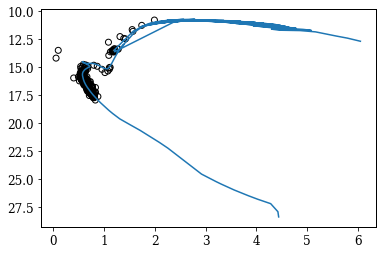

In [13]:
fig, ax = plt.subplots()
ax.scatter(cor,mag, color = 'None', edgecolor = 'black')
ax.plot(isocrona_beau['BP-RP'] + E, isocrona_beau['Gmag'] + Ag + beau.ModDist.item())
ax.invert_yaxis()

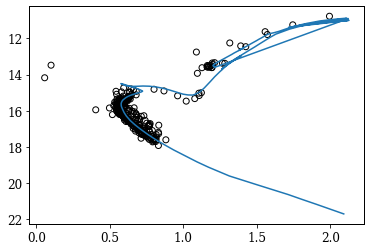

In [14]:
beau_clip = isocrona_beau.loc[isocrona_beau['BP-RP'] < max(cor) + 0.1]
fig, ax = plt.subplots()
ax.scatter(cor,mag, color = 'None', edgecolor = 'black')
ax.plot(beau_clip['BP-RP'] + E, beau_clip['Gmag'] + Ag + beau.ModDist.item())
ax.invert_yaxis()

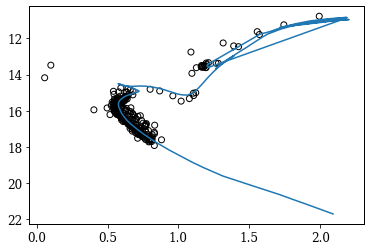

In [15]:
chi_clip = isocrona_chi.loc[isocrona_chi['BP-RP'] < max(cor) + 0.2]
fig, ax = plt.subplots()
ax.scatter(cor,mag, color = 'None', edgecolor = 'black')
ax.plot(chi_clip['BP-RP'] + E, chi_clip['Gmag'] + Ag + chi.ModDist.item())
ax.invert_yaxis()

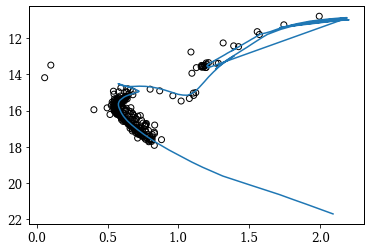

In [16]:
dias_clip = isocrona_dias.loc[isocrona_dias['BP-RP'] < max(cor) + 0.2]
fig, ax = plt.subplots()

ax.scatter(cor,mag, color = 'None', edgecolor = 'black')
ax.plot(dias_clip['BP-RP'] + E, dias_clip['Gmag'] + Ag + dias.ModDist.item())
ax.invert_yaxis()

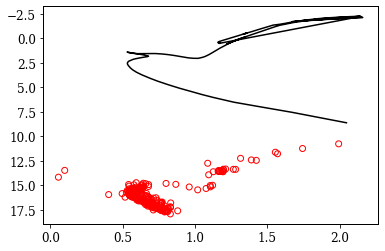

In [17]:
fig, ax = plt.subplots()

ax.scatter(cor,mag, color = 'None', edgecolor = 'red')
ax.plot(dias_clip['BP-RP'], dias_clip['Gmag'], color = 'k')
ax.invert_yaxis()

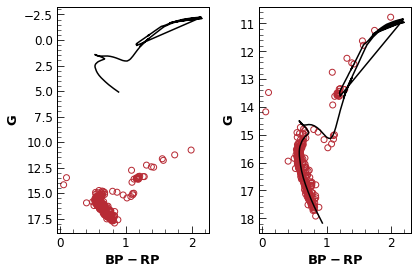

In [147]:
from matplotlib.ticker import AutoMinorLocator

fig = plt.figure()
ax1 = fig.add_subplot(2,2,(1,3))
ax2 = fig.add_subplot(2,2,(2,4))


i = 13

ax1.scatter(cor,mag, color = 'None', edgecolor = '#B72B35')
ax1.plot(dias_clip['BP-RP'][i:], dias_clip['Gmag'][i:], color = 'k')
ax1.invert_yaxis()
ax1.set_ylabel(r'$\mathbf{G}$')
ax1.set_xlabel(r'$\mathbf{BP - RP}$')

ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax1.tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax1.tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax1.tick_params(which = 'minor', axis = 'x', direction='in', length = 4)


ax2.scatter(cor,mag, color = 'None', edgecolor = '#B72B35')
ax2.plot(chi_clip['BP-RP'][i:] + E, chi_clip['Gmag'][i:] + Ag + chi.ModDist.item(), color  = 'k')
ax2.invert_yaxis()
ax2.set_ylabel(r'$\mathbf{G}$')
ax2.set_xlabel(r'$\mathbf{BP - RP}$')


ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax2.tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax2.tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax2.tick_params(which = 'minor', axis = 'x', direction='in', length = 4)

plt.tight_layout()
#plt.savefig('fit_isochrone.jpg', format = 'jpg', dpi = 300)

In [85]:
cantat = pd.read_csv('../../cantat-2020.csv')
cantat

,Cluster,RA_ICRS,DE_ICRS,r50,nbstars07,pmRA_,pmDE,plx,Flag,AgeNN,AVNN,DMNN,X,Y,Z,Rgc
0,ASCC_10,51.870,34.981,0.558,65,-1.737,-1.368,1.459,NN,8.42,0.63,9.10,-573.0,258.0,-201.0,8917.0
1,ASCC_101,288.399,36.369,0.372,69,0.934,1.288,2.488,NN,8.69,0.19,8.08,151.0,374.0,83.0,8197.0
2,ASCC_105,295.548,27.366,0.648,113,1.464,-1.635,1.783,NN,7.87,0.41,8.77,259.0,504.0,20.0,8096.0
3,ASCC_107,297.164,21.987,0.174,57,-0.155,-5.156,1.109,NN,7.23,1.69,9.70,449.0,744.0,-28.0,7925.0
4,ASCC_108,298.306,39.349,0.537,188,-0.519,-1.690,0.838,NN,8.03,0.34,10.32,310.0,1110.0,122.0,8105.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,vdBergh_1,99.275,3.078,0.030,68,0.396,-0.771,0.523,NN,7.61,1.89,11.45,-1709.0,-930.0,-60.0,10092.0
2013,vdBergh_80,97.739,-9.625,0.143,75,-3.298,0.418,1.025,NN,6.81,1.53,9.80,-696.0,-569.0,-140.0,9054.0
2014,vdBergh_83,100.025,-27.189,0.151,48,-2.896,3.199,1.034,NN,7.49,0.51,9.76,-480.0,-724.0,-222.0,8850.0
2015,vdBergh_85,101.718,1.320,0.040,29,-1.000,0.328,0.552,NN,6.64,1.35,11.14,-1445.0,-876.0,-12.0,9824.0


In [98]:
clusters_sul = ['Auner 1', 'Berkeley 73', 'NGC 1193', 'ESO 92-5' ,'NGC 2243', 'Melotte 66', 'Berkeley 56', 'Berkeley 75', 'ESO 92-18','Berkeley 25', 'FSR 1419', 'AM 2',
'Czernik 26', 'Berkeley 102', 'Tombaugh 2', 'Berkeley 20','Berkeley 22','NGC 2204', 'Dolidze 25', 'ESO 96-4' ,'UKS 2', 'Gaia 1', 'Gaia 2' ]

clusters_norte = ['Berkeley 29', 'Berkeley 92', 'Berkeley 99', 'Berkeley 8' ,'NGC 2420' ,'NGC 6791', 
'King 8', 'Berkeley 23', 'Berkeley 31','Haffner 18', 'UBC 615', 'UBC 648', 'UBC 624']

In [106]:
sul = [w.replace(' ', '_') for w in clusters_sul]
sul = [w.replace('-', '_') for w in sul]
norte = [w.replace(' ', '_') for w in clusters_norte]

aglomerados = sul + norte

In [105]:
cantat

,Cluster,RA_ICRS,DE_ICRS,r50,nbstars07,pmRA_,pmDE,plx,Flag,AgeNN,AVNN,DMNN,X,Y,Z,Rgc
0,ASCC_10,51.870,34.981,0.558,65,-1.737,-1.368,1.459,NN,8.42,0.63,9.10,-573.0,258.0,-201.0,8917.0
1,ASCC_101,288.399,36.369,0.372,69,0.934,1.288,2.488,NN,8.69,0.19,8.08,151.0,374.0,83.0,8197.0
2,ASCC_105,295.548,27.366,0.648,113,1.464,-1.635,1.783,NN,7.87,0.41,8.77,259.0,504.0,20.0,8096.0
3,ASCC_107,297.164,21.987,0.174,57,-0.155,-5.156,1.109,NN,7.23,1.69,9.70,449.0,744.0,-28.0,7925.0
4,ASCC_108,298.306,39.349,0.537,188,-0.519,-1.690,0.838,NN,8.03,0.34,10.32,310.0,1110.0,122.0,8105.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,vdBergh_1,99.275,3.078,0.030,68,0.396,-0.771,0.523,NN,7.61,1.89,11.45,-1709.0,-930.0,-60.0,10092.0
2013,vdBergh_80,97.739,-9.625,0.143,75,-3.298,0.418,1.025,NN,6.81,1.53,9.80,-696.0,-569.0,-140.0,9054.0
2014,vdBergh_83,100.025,-27.189,0.151,48,-2.896,3.199,1.034,NN,7.49,0.51,9.76,-480.0,-724.0,-222.0,8850.0
2015,vdBergh_85,101.718,1.320,0.040,29,-1.000,0.328,0.552,NN,6.64,1.35,11.14,-1445.0,-876.0,-12.0,9824.0


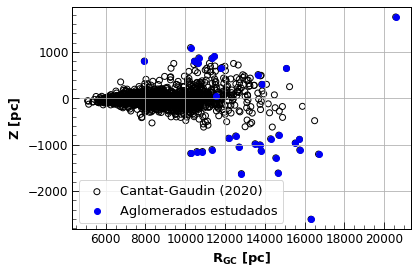

In [156]:
fig, ax = plt.subplots()

not_in = cantat[(cantat.Cluster.isin(aglomerados) == False) | (np.abs(cantat.Z) <= 800)]
ax.scatter(cantat.Rgc,cantat.Z, color = 'None', edgecolor = 'k', label = 'Cantat-Gaudin (2020)')


final = cantat.loc[(cantat.Cluster.isin(aglomerados)) | (np.abs(cantat.Z) >= 800) ]
ax.scatter(final.Rgc,final.Z,  color = '#0000F5', label = 'Aglomerados estudados')


ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax.tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax.tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax.tick_params(which = 'minor', axis = 'x', direction='in', length = 4)
ax.set_xlabel(r'$\mathbf{R_{GC}}$ [pc]', fontweight ='bold')
ax.set_ylabel(r'$\mathbf{Z}$ [pc]', fontweight = 'bold')

ax.legend()
ax.grid()
plt.tight_layout()

plt.savefig('cantat_rgc_z.jpg', format = 'jpg', dpi = 300)